In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data=pd.read_csv('clean_data.csv')
data.head()

C:\Users\andri\AppData\Local\Temp\ipykernel_14908\3132916111.py:1: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('clean_data.csv')


,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1,1,3/7/2025 16:30,3/8/2025 19:25,SEN,CDG,ORY,LGW,...,2,3,True,64,25,13,45,0,135,0-200
1,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:25,SEN,CDG,ORY,LHR,...,2,2,True,64,25,13,23,0,145,0-200
2,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:50,SEN,CDG,CDG,LGW,...,2,2,True,64,25,25,45,0,135,0-200
3,London,Paris,1,1,3/7/2025 16:30,3/8/2025 12:00,SEN,CDG,ORY,LGW,...,2,1,True,64,25,13,45,0,140,0-200
4,London,Paris,1,1,3/7/2025 16:30,3/8/2025 15:20,SEN,CDG,ORY,LGW,...,2,2,True,64,25,13,45,0,140,0-200


In [3]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527232 entries, 0 to 527231
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Origin                             527232 non-null  object
 1   Destination                        527232 non-null  object
 2   TTT                                527232 non-null  int64 
 3   LOS                                527232 non-null  int64 
 4   Arrival Time                       527232 non-null  object
 5   Return Arrival Time                527232 non-null  object
 6   Onward Departure Airport           527232 non-null  object
 7   Onward Arrival Airport             527232 non-null  object
 8   Return Departure Airport           527232 non-null  object
 9   Return Arrival Airport             527232 non-null  object
 10  Onward Airlines                    527232 non-null  object
 11  Return Airlines                    527232 non-null  

## Correlation Analysis
Before building the model, we analyze the correlation between flight price and numerical features.  

### Steps:  
1. Select only numeric features.  
2. Remove constant columns.  
3. Compute correlations with price.  
4. Visualize correlations with a heatmap.  

This helps identify key predictors and remove irrelevant features.  


Correlation between numeric variables and flight price:
Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Month                      0.081097
Checked Bags                         0.039901
Total Connections                    0.038113
Onward Flight Connections            0.027944
Return Flight Connections            0.027640
Return Month                         0.015533
Departure Weekday                   -0.000305
Onward Connection Duration(min)     -0.001828
Return Connection Duration(min)     -0.002180
LOS                                 -0.004541
Departure Time Category Num         -0.018463
Return Time Category Num            -0.042170
Return Weekday                      -0.042786
Return Departure Airport Distance   -0.061253
TTT                                 -0.062268
Return Arrival Airport D

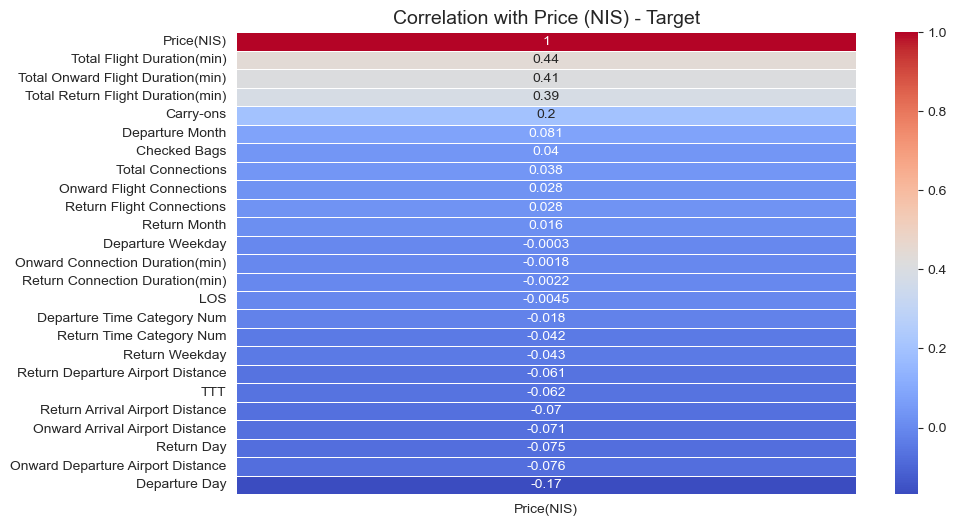

In [5]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Removing constant columns (columns with only one unique value)
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1]

# Printing correlation of all numeric variables with flight price
print("Correlation between numeric variables and flight price:")
correlation_with_price = numeric_data.corr()['Price(NIS)'].sort_values(ascending=False)
print(correlation_with_price)

# Visualizing the correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr()[['Price(NIS)']].sort_values(by='Price(NIS)', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation with Price (NIS) - Target", fontsize=14)
plt.show()


In [6]:
correlation_with_price = abs(correlation_with_price).sort_values(ascending=False)
correlation_with_price.head(12)

Price(NIS)                           1.000000
Total Flight Duration(min)           0.439293
Total Onward Flight Duration(min)    0.409827
Total Return Flight Duration(min)    0.386589
Carry-ons                            0.198557
Departure Day                        0.168935
Departure Month                      0.081097
Onward Departure Airport Distance    0.076258
Return Day                           0.074558
Onward Arrival Airport Distance      0.070608
Return Arrival Airport Distance      0.070343
TTT                                  0.062268
Name: Price(NIS), dtype: float64

## Data Preparation  

Before training the model, we define the features (X) and target variable (y).  

### Steps:  
1. Select all relevant features.  
2. Split the data into training (70%) and testing (30%) sets.  
3. Print dataset sizes to verify the split.  

This ensures the model is trained on one part of the data and evaluated on unseen data.  


In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

In order to use categorical columns, we have to use one-hot encoding (dummies) or use categorical types

In [9]:
cat_columns = ["Origin", "Destination", "Arrival Time", "Return Arrival Time",
               "Onward Departure Airport", "Onward Arrival Airport", "Return Departure Airport", "Return Arrival Airport",
               "Onward Airlines", "Return Airlines", "Onward Flight Connection Airport", "Return Flight Connection Airport",
               "Snapshot Date", "Site", "Flight Duration Binned"]

for col in cat_columns:
    data[col] = data[col].astype("category")

In [10]:
X = data.drop(columns=['Price(NIS)','Flight Duration Binned','Total Flight Duration(min)','Snapshot Date','Arrival Time','Return Arrival Time','Onward Flight Connections','Onward Flight Connection Airport','Return Flight Connections','Return Flight Connection Airport','Departure Day','Return Day','Departure Month','Return Month'])
y = data['Price(NIS)']

In [11]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (369062, 27), Test set: (158170, 27)


## Initial XGBOOST Model
- Train a **XGBOOST** model.  
- Predict flight prices on the test set.  
- Evaluate performance using **MSE** and **R² Score**. 


In [12]:
xgb=XGBRegressor(objective='reg:squarederror',enable_categorical=True,random_state=101)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 5003.71
R² Score: 0.8834
Mean Absolute Error (MAE): 53.01
Root Mean Squared Error (RMSE): 70.74


### Model Performance  
__________________________________  
- **MSE:** 5003.71 → Measures the average squared error in predictions.  
- **R² Score:** 0.8834 → The model explains 88.34% of the variance in flight prices.  
- **MAE:** 53.01 → The model's average absolute error is 53.01 NIS.  
- **RMSE:** 70.74 → The root mean squared error, which gives a sense of the model's error magnitude, is 70.74 NIS.


### Insights and Next Steps  
___________________
- We got Pretty good prediction, still we want to reduce overfitting chance. 
- To make it more accurate, we check **feature importance** to find the most important predictors.  
- By analyzing feature impact, we can **remove unhelpful features** and improve the model.  

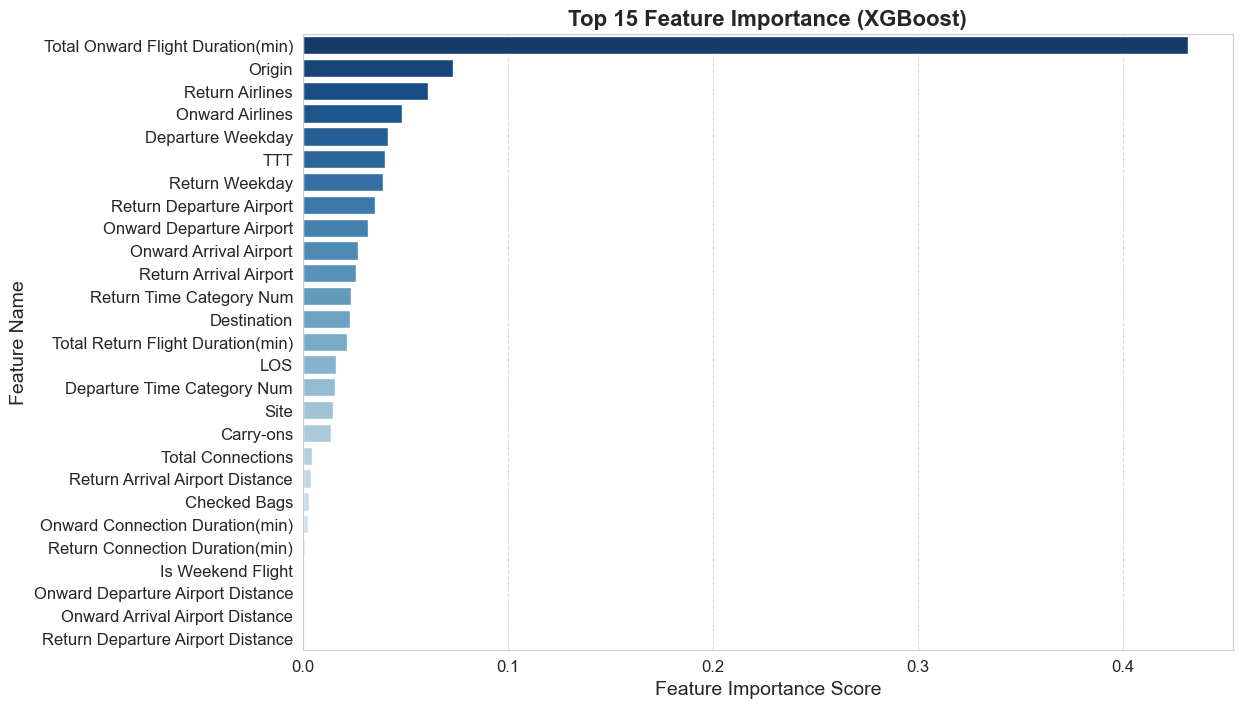

In [13]:
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb.feature_importances_})

# Sort by importance and keep the top 15 features
importance_df = importance_df.sort_values(by="Importance", ascending=False).tail(35)

# Set Seaborn style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")

# Beautify the plot
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.title("Top 15 Feature Importance (XGBoost)", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

# Now lets remove the least important features 

In [14]:
X.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Connection Duration(min)', 'Return Connection Duration(min)',
       'Carry-ons', 'Checked Bags', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Weekday',
       'Return Weekday', 'Departure Time Category Num',
       'Return Time Category Num', 'Is Weekend Flight',
       'Onward Departure Airport Distance', 'Onward Arrival Airport Distance',
       'Return Departure Airport Distance', 'Return Arrival Airport Distance',
       'Total Connections'],
      dtype='object')

In [15]:
X = data.drop(columns=['Return Arrival Airport Distance','Return Departure Airport Distance','Onward Arrival Airport Distance','Onward Departure Airport Distance','Is Weekend Flight','Return Connection Duration(min)','Onward Connection Duration(min)','Checked Bags'])


In [16]:
xgb=XGBRegressor(objective='reg:squarederror',enable_categorical=True,random_state=101)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 5003.71
R² Score: 0.8834
Mean Absolute Error (MAE): 53.01
Root Mean Squared Error (RMSE): 70.74


We can see that there is almost no change in the parameters after the removal, yer it will make the algo run faster

# Lets Boost With Params


In [ ]:

param_grid = {
    'n_estimators': [100, 200, 500],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7], 
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0]  }

xgb = XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}


In [74]:
y_pred = best_model.predict(X_test)


In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 32.31
MSE: 2307.50
RMSE: 48.04
R² Score: 0.9648


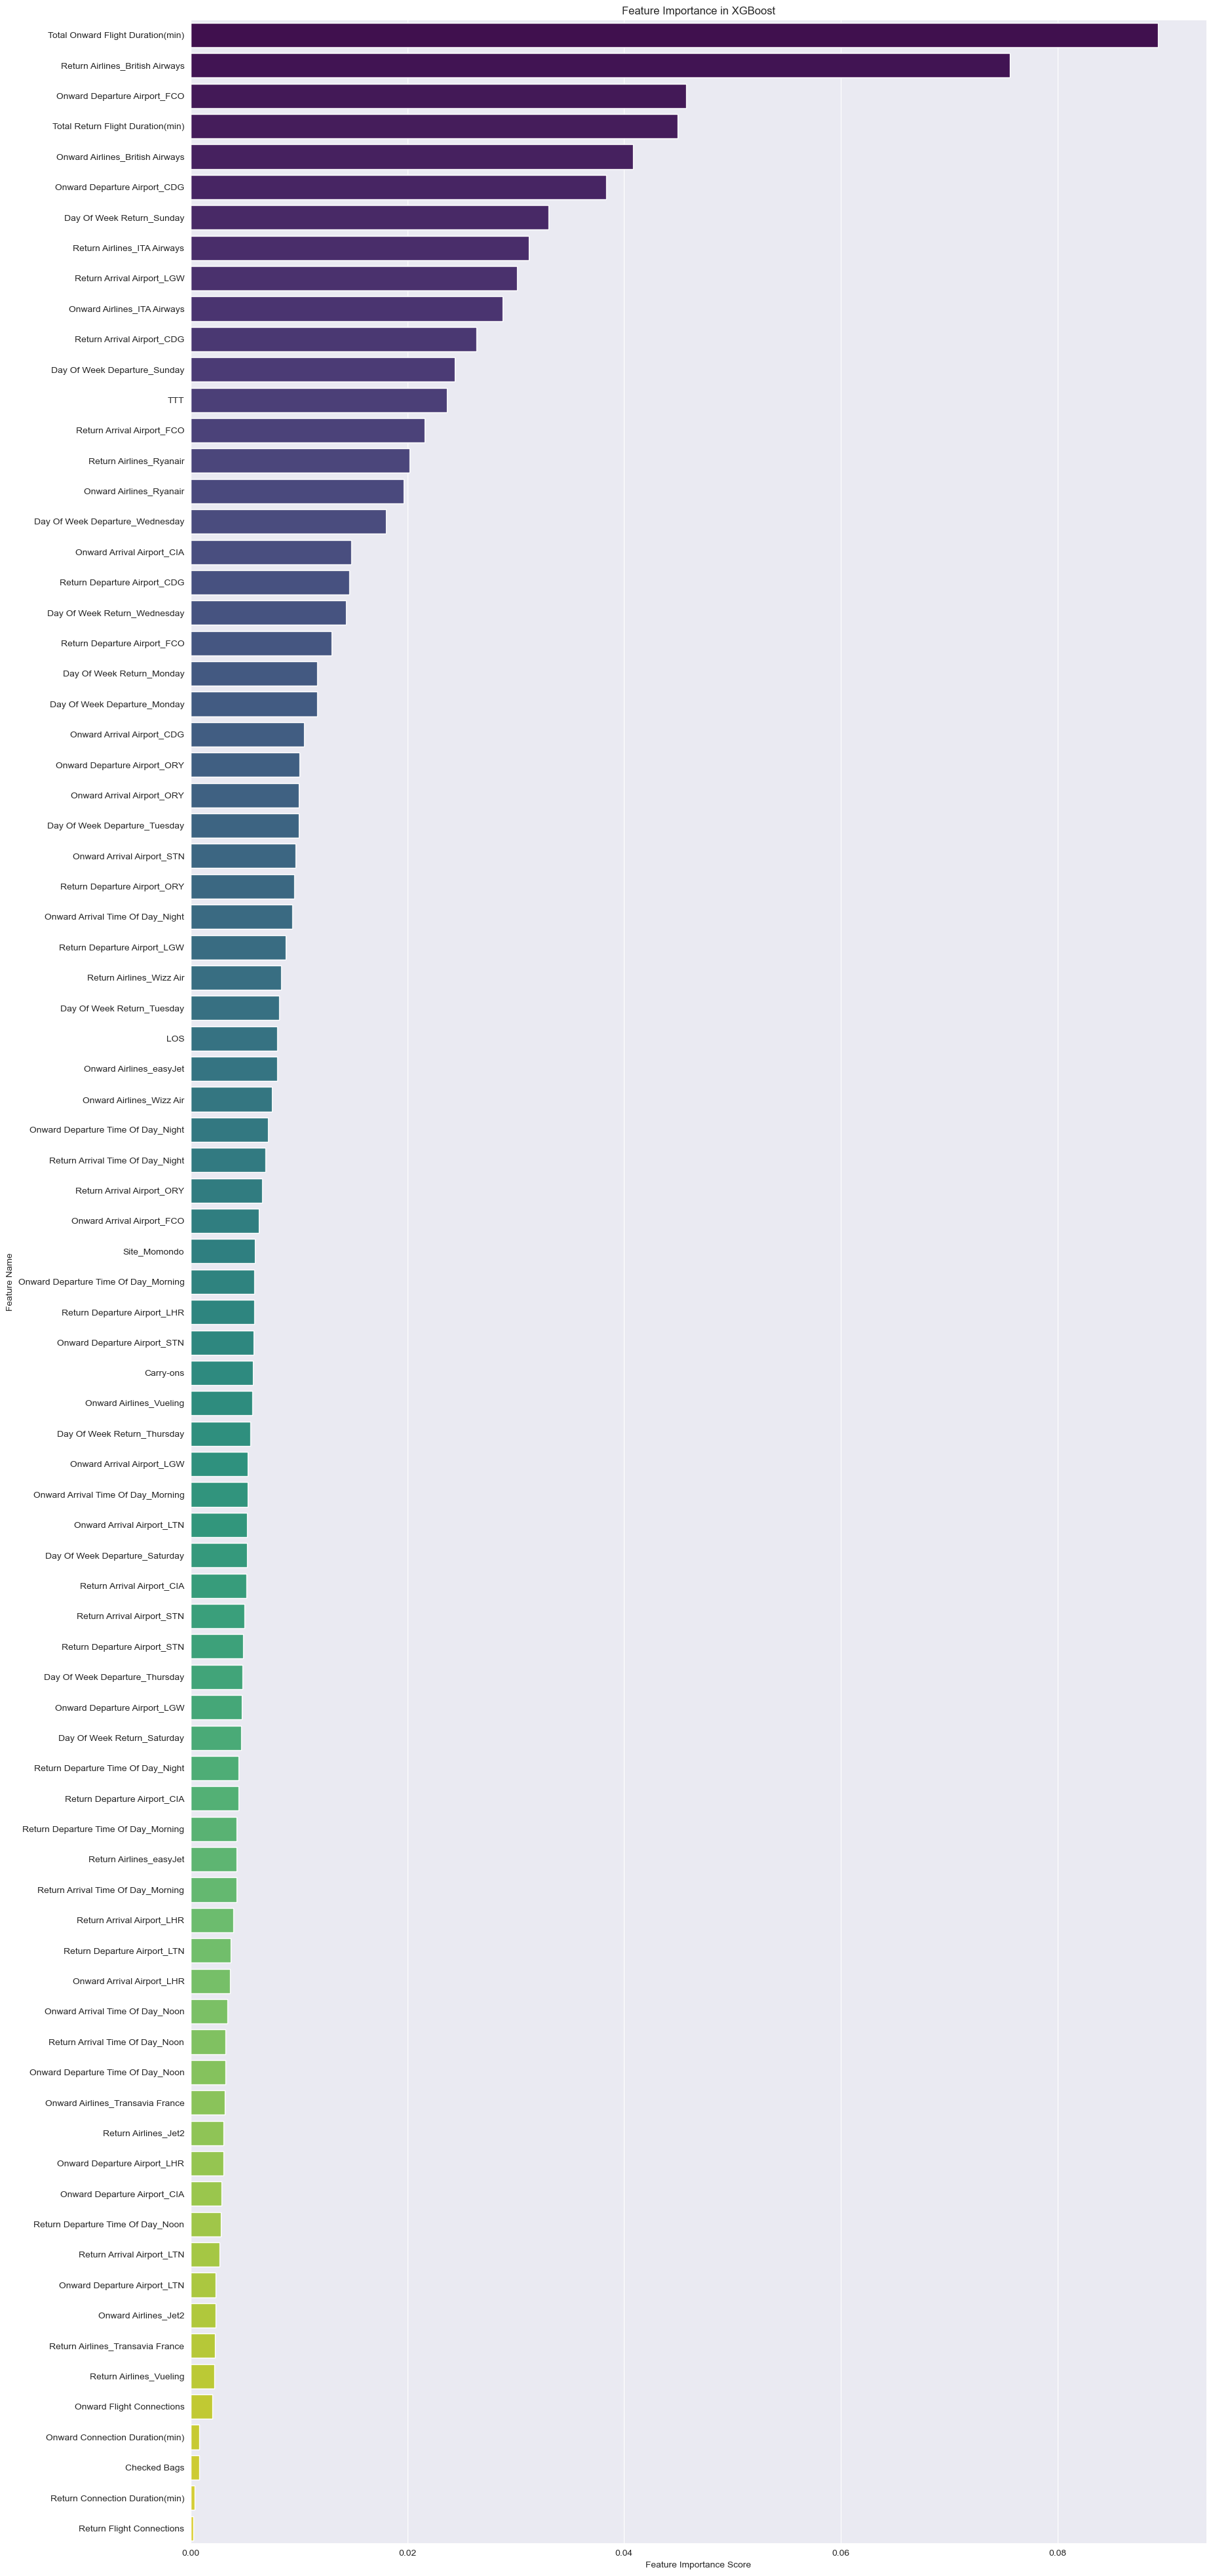

In [76]:
importances = best_model.feature_importances_

# סידור הפיצ'רים לפי חשיבות
sorted_idx = np.argsort(importances)[::-1]
feature_names = X_train.columns[sorted_idx]

# הצגת גרף חשיבות
plt.figure(figsize=(20,50))
sns.barplot(x=importances[sorted_idx], y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in XGBoost")
plt.show()

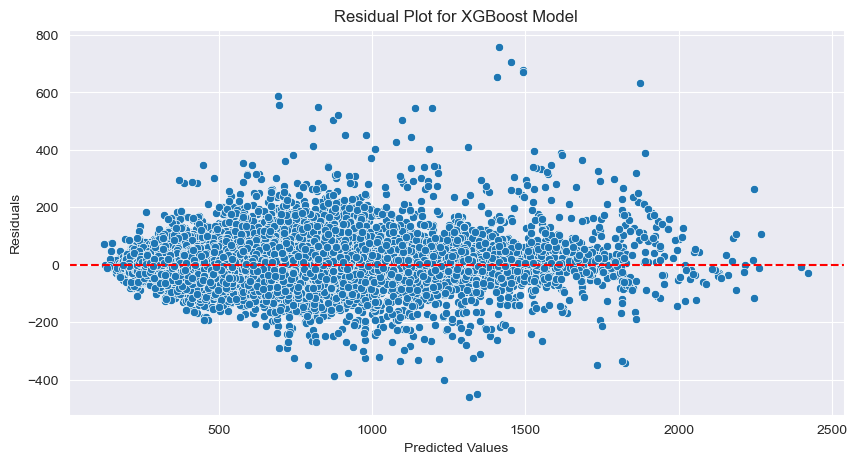

In [77]:
residuals = y_test - y_pred

# שרטוט גרף Residuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for XGBoost Model")
plt.show()

In [78]:
"""for new X's without Y
future_predictions = best_model.predict(X_future)
print(future_predictions)"""

"for new X's without Y\nfuture_predictions = best_model.predict(X_future)\nprint(future_predictions)"

# Colclusion:
In this study, we utilized XGBoost with optimized hyperparameters (colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=500, subsample=0.8), achieving strong predictive performance (R² = 0.9648). The residual plot indicates that while the model performs well overall, some variance exists at higher predicted values, suggesting minor heteroscedasticity. However, no significant patterns in the residuals suggest that overfitting is well-controlled, likely due to the chosen parameters, particularly subsample=0.8 and learning_rate=0.2, which help generalize better.

The feature importance analysis highlights an interesting result—return airline choices (e.g., British Airways, ITA Airways) are more influential than certain categorical features like "TTT." This may be due to the return airline directly influencing ticket prices and overall travel experience, whereas "TTT" may capture less relevant or redundant information. when still Sunday as the day of departure is very important. While this might seem unexpected, it reflects the strong correlation between airline selection and pricing strategies. Overall, our findings suggest that XGBoost is an effective approach for predicting flight prices, with key insights into feature relevance and model generalization